In [3]:
# Paquetes Generales
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import time
import os
import sys
import locale
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import shutil
import subprocess
from os.path import isfile, join

# Paquetes Especificos
import librosa
import soundfile as sf
import pydub
import scipy
import librosa.display
from scipy.signal import butter, filtfilt
from pydub import AudioSegment
from pydub.effects import normalize
import tensorflow as tf
from tensorflow import keras
from IPython.display import display, Audio

In [50]:
path = r'cv-corpus-18.0-delta-2024-06-14/es/clips'
TICKS = np.array([31.25, 62.5, 125, 250, 500, 1000, 2000, 4000, 8000])
TICK_LABELS = np.array(["31.25", "62.5", "125", "250", "500", "1k", "2k", "4k", "8k"])

In [61]:
Path(path)

WindowsPath('cv-corpus-18.0-delta-2024-06-14/es/clips')

In [13]:
audio_track_names = [file_name for file_name in os.listdir(path) if file_name.endswith('.mp3')]

In [44]:
data, sr = sf.read(path  + '/' + audio_track_names[0])

In [65]:
def plot_spectrogram(signal : np.array, sample_rate : int, output_path : Path, fft_size=2048, hop_size=None, window_size=None) -> None:
    if not window_size:
        window_size = fft_size

    if not hop_size:
        hop_size = window_size // 4
    # Short Time Fourier Transform
    stft = librosa.stft(signal, n_fft=fft_size, hop_length=hop_size, win_length=window_size)
    spectrogram = np.abs(stft)
    # db: decibeles
    spectrogram_db = librosa.amplitude_to_db(spectrogram)

    plt.figure(figsize=(10,4))
    img = librosa.display.specshow(spectrogram_db, y_axis='log', x_axis='time',
                                   sr=sample_rate, cmap='inferno', hop_length=hop_size,
                                   win_length=window_size, n_fft=fft_size)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.yticks(TICKS, TICK_LABELS)
    plt.colorbar(img, format='%+1.f dBFS')

    plt.savefig(output_path.with_stem(f'_WINLEN={window_size}_HOPLEN={hop_size}_NFFT={fft_size}'), dpi=300, bbox_inches='tight', transparent=False)
    plt.show()

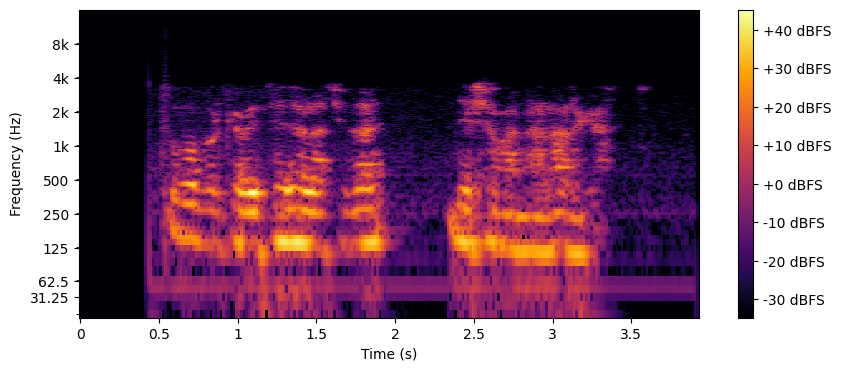

In [67]:
plot_spectrogram(data, sr, Path(path)/'spectrogram')

In [20]:
spec = librosa.feature.melspectrogram(y=data, sr=sr)

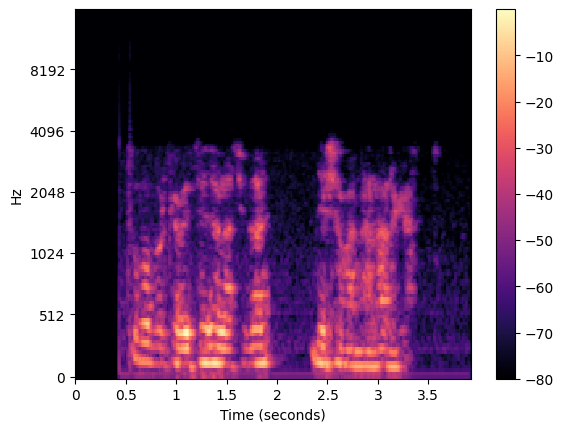

In [27]:
db_spec = librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec, y_axis='mel', x_axis='s', sr=sr)
plt.colorbar()

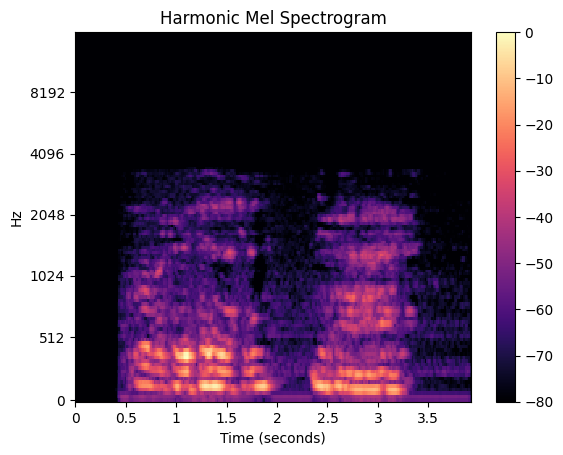

In [36]:
data_h, data_p = librosa.effects.hpss(data)

spec_h = librosa.feature.melspectrogram(y=data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(y=data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h, ref=np.max,)
db_spec_p = librosa.power_to_db(spec_p, ref=np.max,)


librosa.display.specshow(db_spec_h, y_axis='mel', x_axis='s', sr=sr)
plt.title('Harmonic Mel Spectrogram')
plt.colorbar()

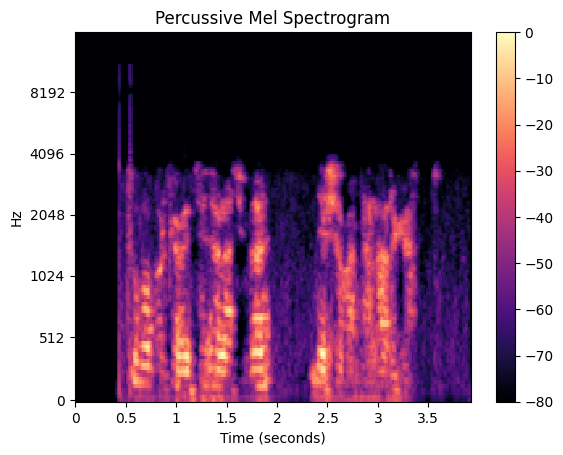

In [37]:
librosa.display.specshow(db_spec_p, y_axis='mel', x_axis='s', sr=sr)
plt.title('Percussive Mel Spectrogram')
plt.colorbar()

In [40]:
librosa.beat.tempo(y=data, sr=sr)

array([144.23076923])